# Adaptive Signal Processing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy import fftpack
from scipy import signal
from scipy import random
from scipy import io
from scipy import linalg

Instead using the API code of signal.STFT, we rewrite our own version of STFT for a better control of our variables during this program. Using our version of STFT (Short Time Fourier Transform) to segment, in other word, represent the time series into “frequency & time” domain (time segment):

In [3]:
def stft(x):
    M=np.empty([1,1024])
    for i in range (0, 500):
        s=128*i
        m=x[s:s+1024]*np.hanning(1024)
        mf=scipy.fft(m)
        if i==0:
            M=mf
        else:
            M=np.vstack((M,mf))
    return M.T

using the io.wavfile.read to load the signal (given):

In [4]:
ratex, x = io.wavfile.read('x.wav')
rated, d = io.wavfile.read('d.wav')

In [5]:
Zxx = stft(x)
Zdd = stft(d)

In terms of each frequency bin k(which ranges from 0 to 1024, because of symmetric, we only plot the first half slot in plots, which represents 512 points in each plot).
In order to build $R$ and $p$, we calculated the auto-correlations of signal $x$ and $d$ respectively, and cross-correlation of signal $x$ and $d$. By doing so, we could establish the $R$ matric and vector $p$, where $R$ is the Toeplitz matrix consisting of auto-correlation terms of the input signal, and $p$ is a vector constructing from the cross-correlation of signal $x$ and $d$.


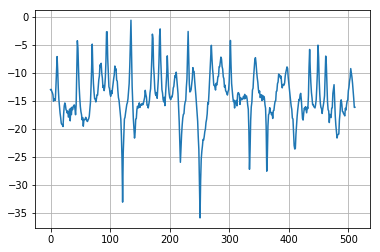

when N = 5


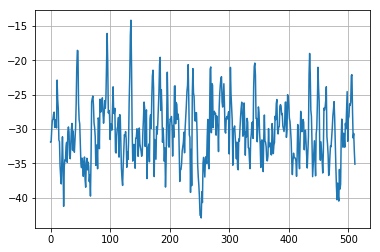

In [6]:
corr_xx_n =[]
corr_xd_n = []
corr_dd_n = []
wopt_n1 = []
MMSE_n1 = []
R_n1 = []
p_n1 = []
d_n1 = []
wopt_n1 = []
norm_MMSE_n1 = []
norm_MMSE_n1_dB = []
dB_n1 = np.empty(1024)

###Q1
for i in range(0,1024):
    corr_xx = np.correlate(Zxx[i,:], Zxx[i,:], mode='full')/len(Zxx[i,:])
    corr_xx = corr_xx[len(Zxx[i,:])-1:]
    
    corr_xd = np.correlate(Zxx[i,:], Zdd[i,:], mode='full')/len(Zxx[i,:])
    corr_xd = corr_xd[len(Zxx[i,:])-1:]
    
    corr_dd = np.correlate(Zdd[i,:], Zdd[i,:], mode='full')/len(Zxx[i,:])
    corr_dd = corr_dd[len(Zxx[i,:])-1:]
    
    R_n1 = scipy.linalg.toeplitz(corr_xx[0], corr_xx[0])
    p_n1 = corr_xd[0]
    d_n1 = corr_dd[0]
    
    wopt_n1 = 1/R_n1 * p_n1
    MMSE_n1 = d_n1 - p_n1.conj() * wopt_n1
    norm_MMSE_n1 = np.real(MMSE_n1 / d_n1)
    #dB_n1[i] = norm_MMSE_n1
    norm_MMSE_n1_dB = 10*np.log10(norm_MMSE_n1)
    dB_n1[i] = norm_MMSE_n1_dB

plt.plot(dB_n1[0:512])
plt.grid()
plt.show()

### N = 5
dB_n5 = np.empty(1024)
d_n5_n = np.empty(1024)
print ('when N = 5')
for j in range(0,513):
    corr_xx = np.correlate(Zxx[j,:], Zxx[j,:], mode='full')/len(Zxx[j,:])
    corr_xx = corr_xx[len(Zxx[j,:])-1:]
    
    corr_xd = np.correlate(Zxx[j,:], Zdd[j,:], mode='full')/len(Zxx[j,:])

    corr_dd = np.correlate(Zdd[j,:], Zdd[j,:], mode='full')/len(Zdd[j,:])
    corr_dd = corr_dd[len(Zxx[j,:])-1:]
    
    R_n5 = scipy.linalg.toeplitz(corr_xx[0:5].conj(), corr_xx[0:5])
    p_n5 = corr_xd[(len(Zxx[j,:])-1):(len(Zxx[j,:])-6):-1]

    d_n5 = corr_dd[0]
    wopt_n5 = np.matmul(np.linalg.inv(R_n5) , p_n5)
    MMSE_n5 = np.real(d_n5 - np.matmul(p_n5.conj().T, wopt_n5))
    norm_MMSE_n5 = MMSE_n5 / np.real(d_n5)
    #dB_n5[j] = norm_MMSE_n5
    norm_MMSE_n5_dB = 10*np.log10(norm_MMSE_n5)
    dB_n5[j] = norm_MMSE_n5_dB

plt.plot(dB_n5[0:512])
plt.grid()
plt.show()

Discussion: Having a FIR causal filter of size $N$ applied to the “time” sequence,or segments, of each frequency bin signal,means that a frequency dependent response can be obtained within each bin or frequency “band”, as opposedto a flat constant response assumed in the band. So it is similar to increasing the frequency resolution of theoverall Wiener filter.
$N=5$ looks like more vibrated, or sharp than the case where $N=1$, which means $N=5$ increases the resolution over overall wiener filter. The amplitude from $N=5$ is larger in dB than that in the case $N=1$, so that $N=5$ gains smaller MMSE in each frequency bin, which we can say performs better that the case $N=1$.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: ComplexWarning: Casting complex values to real discards the imaginary part


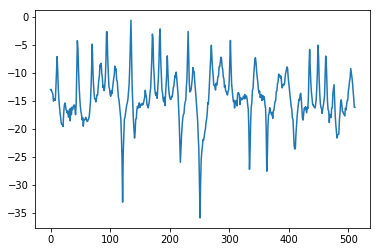

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


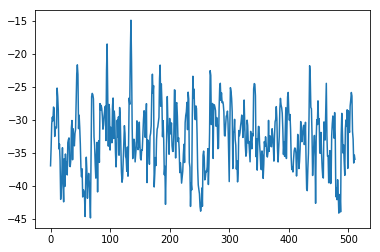

In [7]:
#Q2

L=len(Zxx)
sum_n = np.empty(L)
norm_MMSE_n1_dB_n=np.empty(L)

for i in range(0,1024):
    corr_xx = (np.correlate(Zxx[i,:], Zxx[i,:], mode='full')/len(Zxx[j,:]))[len(Zxx[i,:])-1:]
    
    corr_xd = (np.correlate(Zxx[i,:], Zdd[i,:], mode='full')/len(Zxx[j,:]))[len(Zdd[i,:])-1:]
    
    corr_dd = (np.correlate(Zdd[i,:], Zdd[i,:], mode='full')/len(Zxx[j,:]))[len(Zdd[i,:])-1:]
    
    R_n1 = scipy.linalg.toeplitz(corr_xx[0], corr_xx[0])
    p_n1 = corr_xd[0]
    wopt_n1 = 1/R_n1 * p_n1
    d_n1 = np.matrix(Zdd[i,:])
    
    e_n1 = d_n1 - np.matmul(wopt_n1.conj(), np.matrix(Zxx[i,:]))
 
    sum_e=0
    for j in range(0,500):
        sum_e = sum_e + e_n1[0,j]*e_n1[0,j].conj()
        
    MMSE_n1 = sum_e/500

    norm_MMSE_n1 = MMSE_n1 / corr_dd[0]

    norm_MMSE_n1_dB_n[i] = 10*np.log10(norm_MMSE_n1)

plt.plot(norm_MMSE_n1_dB_n[0:512])
plt.show()  





dB_n5 = np.empty(L)
norm_MMSE_n5_dB_n=np.empty(L)
norm_MMSE_n51=np.empty(L)
for j in range(0, 1024):
    
    corr_xx = (np.correlate(Zxx[j,:], Zxx[j,:], mode='full')/len(Zxx[j,:]))[len(Zxx[j,:])-1:]
    
    corr_xd = (np.correlate(Zxx[j,:], Zdd[j,:], mode='full')/len(Zxx[j,:]))

    corr_dd = (np.correlate(Zdd[j,:], Zdd[j,:], mode='full')/len(Zxx[j,:]))[len(Zxx[j,:])-1:]
  
    R_n5 = scipy.linalg.toeplitz(corr_xx[0:5].conj(), corr_xx[0:5])
    p_n5 = corr_xd[(len(Zxx[j,:])-1):(len(Zxx[j,:])-6):-1]
    d_n5 = np.matrix(Zdd[j,:])
    
    wopt_n5 = np.linalg.inv(R_n5).dot((p_n5).T)

    M=np.zeros(shape=(5,500))
    m1=Zxx[j,:]
    m2=np.hstack((np.zeros(1),Zxx[j,:]))[0:500]
    m3=np.hstack((np.zeros(1),m2))[0:500]
    m4=np.hstack((np.zeros(1),m3))[0:500]
    m5=np.hstack((np.zeros(1),m4))[0:500]
    m=np.vstack((np.vstack((np.vstack((np.vstack((m1,m2)),m3)),m4)),m5))
    
    e_n5 = d_n5 - np.matmul(wopt_n5.conj(), m)
 
    sum_e=0

    for mm in range(0,500):
        sum_e = sum_e + e_n5[0,mm]*e_n5[0,mm].conj()
        
    MMSE_n5 = sum_e/500

    norm_MMSE_n5 = MMSE_n5 / corr_dd[0]
    
    norm_MMSE_n51[j]=norm_MMSE_n5
    norm_MMSE_n5_dB = 10*np.log10(np.real(norm_MMSE_n5))
    norm_MMSE_n5_dB_n[j] = norm_MMSE_n5_dB

plt.plot(norm_MMSE_n5_dB_n[0:512])
plt.show()  




Again, $N$ FIR coefficients have applied to each time segments along each frequency bin,can increase the frequency resolution of theoverall Wiener filter.
$N=5$ looks like sharper than the case where $N=1$, which means $N=5$ increases the resolution over overall wiener filter. The amplitude from $N=5$ is larger in dB than that in the case $N=1$, so that $N=5$ gains smaller MMSE in each frequency bin, which we can say $N=5$ performs better to the case where $N=1$.


ifft will also applied to reconstruct the $y$ signal, which will be built by the superposition/addition of the overlapping output time domain segments obtained from the iffts.
And to obtained the error signal (window procedure leads to an output signal that has a gain 4 times larger than its normal level):


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


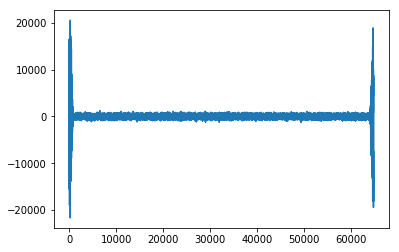

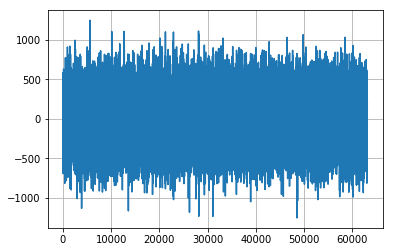

0.0011640443255727538


In [41]:

# Q3

seg_yn=np.empty(shape=(1024,500),dtype='complex')

for i in range(0,1024):
    corr_xx = (np.correlate(Zxx[i,:], Zxx[i,:], mode='full')/len(Zxx[j,:]))[len(Zxx[i,:])-1:]
    
    corr_xd = (np.correlate(Zxx[i,:], Zdd[i,:], mode='full')/len(Zxx[j,:]))[len(Zdd[i,:])-1:]
    
    corr_dd = (np.correlate(Zdd[i,:], Zdd[i,:], mode='full')/len(Zxx[j,:]))[len(Zdd[i,:])-1:]
    
    R_n1 = scipy.linalg.toeplitz(corr_xx[0], corr_xx[0])
    p_n1 = corr_xd[0]
    wopt_n1 = 1/R_n1 * p_n1
    
    y_n = np.matmul(wopt_n1.conj(), np.matrix(Zxx[i,:]))
    seg_yn[i:]=y_n

    
for j in range(0,500):
    
    y_n=np.real(fftpack.ifft(seg_yn[:,j]))
    seg_yn[:,j]=y_n

size=len(x)
yn=np.zeros(size)

for segm in range(0,500):
    for post in range(0,1024):
        yn[segm*128+post]=seg_yn[post,segm]+yn[segm*128+post]

en=d-yn/4

plt.plot(en)
plt.show()
plt.grid()

length=len(en)
e=en[896:length-896]
dd=d[896:length-896]
leng=len(e)
plt.plot(e)
plt.show()

sum_d=np.zeros(leng)
MMSE=np.zeros(leng)
for idx in range(0,leng-1):
    MMSE[idx]=e[idx]**2
    sum_d[idx]=dd[idx]**2
norm_MMSE=np.sum(MMSE)/np.sum(sum_d)
norm_MMSE_dB=10*np.log10(np.real(norm_MMSE))
print(norm_MMSE)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


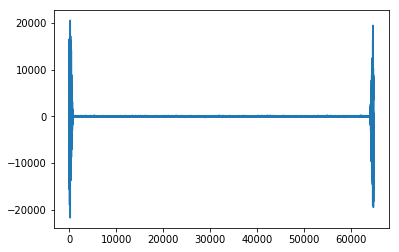

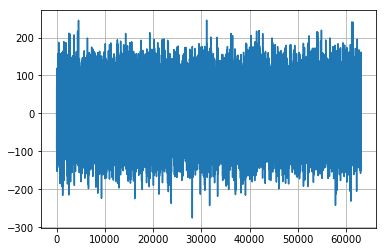

4.959722695959716e-05


In [44]:
seg_yn=np.empty(shape=(1024,500),dtype='complex')


for j in range(0, 1024):
    
    corr_xx = (np.correlate(Zxx[j,:], Zxx[j,:], mode='full')/len(Zxx[j,:]))[len(Zxx[j,:])-1:]
    
    corr_xd = (np.correlate(Zxx[j,:], Zdd[j,:], mode='full')/len(Zxx[j,:]))

    corr_dd = (np.correlate(Zdd[j,:], Zdd[j,:], mode='full')/len(Zxx[j,:]))[len(Zxx[j,:])-1:]
  
    R_n5 = scipy.linalg.toeplitz(corr_xx[0:5].conj(), corr_xx[0:5])
    p_n5 = corr_xd[(len(Zxx[j,:])-1):(len(Zxx[j,:])-6):-1]
    d_n5 = np.matrix(Zdd[j,:])
    
    wopt_n5 = np.linalg.inv(R_n5).dot((p_n5).T)

    M=np.zeros(shape=(5,500))
    m1=Zxx[j,:]
    m2=np.hstack((np.zeros(1),Zxx[j,:]))[0:500]
    m3=np.hstack((np.zeros(1),m2))[0:500]
    m4=np.hstack((np.zeros(1),m3))[0:500]
    m5=np.hstack((np.zeros(1),m4))[0:500]
    m=np.vstack((np.vstack((np.vstack((np.vstack((m1,m2)),m3)),m4)),m5))
    
    y_n = np.matmul(wopt_n5.conj(), m)
    seg_yn[j:]=y_n
    
for k in range(0,500):
    y_n=np.real(fftpack.ifft(seg_yn[:,k]))
    seg_yn[:,k]=y_n

size=len(x)
yn=np.zeros(size)

for segm in range(0,500):
    for post in range(0,1024):
        yn[segm*128+post]=seg_yn[post,segm]+yn[segm*128+post]

en=d-yn/4

plt.plot(en)
plt.show()
plt.grid()

length=len(en)
e=en[896:length-896]
dd=d[896:length-896]
leng=len(e)
plt.plot(e)
plt.show()

MMSE=np.zeros(leng)
sum_d=np.zeros(leng)
for idx in range(0,leng-1):
    MMSE[idx]=e[idx]**2
    sum_d[idx]=dd[idx]**2
norm_MMSE=np.sum(MMSE)/np.sum(sum_d)
norm_MMSE_dB=10*np.log10(np.real(norm_MMSE))
print(norm_MMSE)



Discussion: <br>
Comparing the MMSE from both $N$.<br>
When the $N=1$, the MMSE between signal $x$ and $d$ is: $0.00116404432557$   $(-29.340 dB)$<br>
When the $N=5$, the MMSE between signal $x$ and $d$ is: $0.00004959722695$   $(-43.045 dB)$<br>

$N$ FIR coefficients have applied to each time segments along each frequency bin,can increase the frequency resolution of theoverall Wiener filter.<br>
When $N=5$, in terms of the error e, the amplitudes for each time is around more than 500 to 1000. Meanwhile, it gives around no more than 200 at most moments of error when $N=5$. Obviously the estimated MMSE is -29.340 dB and -43.045 dB for each case.<br>
We have to say, $N=5$ gives more accurate estimations, which has lower MMSE.
